# ENSEMBLE LEARNING

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#reading our dataset
df = pd.read_csv('Information.csv',encoding = 'Latin-1')

In [3]:
df

_unit_id  _golden _unit_state  _trusted_judgments _last_judgment_at  \
0      815719226    False   finalized                   3    10/26/15 23:24   
1      815719227    False   finalized                   3    10/26/15 23:30   
2      815719228    False   finalized                   3    10/26/15 23:33   
3      815719229    False   finalized                   3    10/26/15 23:10   
4      815719230    False   finalized                   3     10/27/15 1:15   
...          ...      ...         ...                 ...               ...   
20045  815757572     True      golden                 259               NaN   
20046  815757681     True      golden                 248               NaN   
20047  815757830     True      golden                 264               NaN   
20048  815757921     True      golden                 250               NaN   
20049  815757985     True      golden                 249               NaN   

       gender  gender:confidence profile_yn  profile_yn:confidence  \
0        male             1.0000        yes                    1.0   
1        male             1.0000        yes                    1.0   
2        male             0.6625        yes                    1.0   
3        male             1.0000        yes                    1.0   
4      female             1.0000        yes                    1.0   
...       ...                ...        ...                    ...   
20045  female             1.0000        yes                    1.0   
20046    male             1.0000        yes                    1.0   
20047    male             1.0000        yes                    1.0   
20048  female             0.8489        yes                    1.0   
20049  female             1.0000        yes                    1.0   

              created  ...                                       profileimage  \
0        12/5/13 1:48  ...  https://pbs.twimg.com/profile_images/414342229...   
1       10/1/12 13:51  ...  https://pbs.twimg.com/profile_images/539604221...   
2      11/28/14 11:30  ...  https://pbs.twimg.com/profile_images/657330418...   
3       6/11/09 22:39  ...  https://pbs.twimg.com/profile_images/259703936...   
4       4/16/14 13:23  ...  https://pbs.twimg.com/profile_images/564094871...   
...               ...  ...                                                ...   
20045    8/5/15 21:16  ...  https://pbs.twimg.com/profile_images/656793310...   
20046   8/15/12 21:17  ...  https://pbs.twimg.com/profile_images/639815429...   
20047     9/3/12 1:17  ...  https://pbs.twimg.com/profile_images/655473271...   
20048   11/6/12 23:46  ...  https://pbs.twimg.com/profile_images/657716093...   
20049   4/14/14 17:22  ...  https://pbs.twimg.com/profile_images/655134724...   

       retweet_count sidebar_color  \
0                  0        FFFFFF   
1                  0        C0DEED   
2                  1        C0DEED   
3                  0        C0DEED   
4                  0             0   
...              ...           ...   
20045              0        C0DEED   
20046              0             0   
20047              0        C0DEED   
20048              0             0   
20049              0        C0DEED   

                                                    text tweet_coord  \
0      Robbie E Responds To Critics After Win Against...         NaN   
1      ÛÏIt felt like they were my friends and I was...         NaN   
2      i absolutely adore when louis starts the songs...         NaN   
3      Hi @JordanSpieth - Looking at the url - do you...         NaN   
4      Watching Neighbours on Sky+ catching up with t...         NaN   
...                                                  ...         ...   
20045  @lookupondeath ...Fine, and I'll drink tea too...         NaN   
20046  Greg Hardy you a good player and all but don't...         NaN   
20047  You can miss people and still never want to se...         NaN   
20048  @bitemyapp i had noticed your tendency to pee ...         NaN

In [4]:
#Getting first five rows of datset
df.head()

_unit_id  _golden _unit_state  _trusted_judgments _last_judgment_at  \
0  815719226    False   finalized                   3    10/26/15 23:24   
1  815719227    False   finalized                   3    10/26/15 23:30   
2  815719228    False   finalized                   3    10/26/15 23:33   
3  815719229    False   finalized                   3    10/26/15 23:10   
4  815719230    False   finalized                   3     10/27/15 1:15   

   gender  gender:confidence profile_yn  profile_yn:confidence  \
0    male             1.0000        yes                    1.0   
1    male             1.0000        yes                    1.0   
2    male             0.6625        yes                    1.0   
3    male             1.0000        yes                    1.0   
4  female             1.0000        yes                    1.0   

          created  ...                                       profileimage  \
0    12/5/13 1:48  ...  https://pbs.twimg.com/profile_images/414342229...   
1   10/1/12 13:51  ...  https://pbs.twimg.com/profile_images/539604221...   
2  11/28/14 11:30  ...  https://pbs.twimg.com/profile_images/657330418...   
3   6/11/09 22:39  ...  https://pbs.twimg.com/profile_images/259703936...   
4   4/16/14 13:23  ...  https://pbs.twimg.com/profile_images/564094871...   

   retweet_count sidebar_color  \
0              0        FFFFFF   
1              0        C0DEED   
2              1        C0DEED   
3              0        C0DEED   
4              0             0   

                                                text tweet_coord tweet_count  \
0  Robbie E Responds To Critics After Win Against...         NaN      110964   
1  ÛÏIt felt like they were my friends and I was...         NaN        7471   
2  i absolutely adore when louis starts the songs...         NaN        5617   
3  Hi @JordanSpieth - Looking at the url - do you...         NaN        1693   
4  Watching Neighbours on Sky+ catching up with t...         NaN       31462   

    tweet_created      tweet_id   tweet_location               user_timezone  
0  10/26/15 12:40  6.587300e+17  main; @Kan1shk3                     Chennai  
1  10/26/15 12:40  6.587300e+17              NaN  Eastern Time (US & Canada)  
2  10/26/15 12:40  6.587300e+17           clcncl                    Belgrade  
3  10/26/15 12:40  6.587300e+17    Palo Alto, CA  Pacific Time (US & Canada)  
4  10/26/15 12:40  6.587300e+17              NaN                         NaN  

[5 rows x 26 columns]

In [5]:
#Getting last five rows of datset
df.tail()

_unit_id  _golden _unit_state  _trusted_judgments _last_judgment_at  \
20045  815757572     True      golden                 259               NaN   
20046  815757681     True      golden                 248               NaN   
20047  815757830     True      golden                 264               NaN   
20048  815757921     True      golden                 250               NaN   
20049  815757985     True      golden                 249               NaN   

       gender  gender:confidence profile_yn  profile_yn:confidence  \
20045  female             1.0000        yes                    1.0   
20046    male             1.0000        yes                    1.0   
20047    male             1.0000        yes                    1.0   
20048  female             0.8489        yes                    1.0   
20049  female             1.0000        yes                    1.0   

             created  ...                                       profileimage  \
20045   8/5/15 21:16  ...  https://pbs.twimg.com/profile_images/656793310...   
20046  8/15/12 21:17  ...  https://pbs.twimg.com/profile_images/639815429...   
20047    9/3/12 1:17  ...  https://pbs.twimg.com/profile_images/655473271...   
20048  11/6/12 23:46  ...  https://pbs.twimg.com/profile_images/657716093...   
20049  4/14/14 17:22  ...  https://pbs.twimg.com/profile_images/655134724...   

       retweet_count sidebar_color  \
20045              0        C0DEED   
20046              0             0   
20047              0        C0DEED   
20048              0             0   
20049              0        C0DEED   

                                                    text tweet_coord  \
20045  @lookupondeath ...Fine, and I'll drink tea too...         NaN   
20046  Greg Hardy you a good player and all but don't...         NaN   
20047  You can miss people and still never want to se...         NaN   
20048  @bitemyapp i had noticed your tendency to pee ...         NaN   
20049  I think for my APUSH creative project I'm goin...         NaN   

      tweet_count   tweet_created      tweet_id      tweet_location  \
20045         783  10/26/15 13:20  6.587400e+17          Verona ªÁ   
20046       13523  10/26/15 12:40  6.587300e+17     Kansas City, MO   
20047       26419  10/26/15 13:20  6.587400e+17      Lagos Nigeria    
20048       56073  10/26/15 12:40  6.587300e+17  Texas Hill Country   
20049        2922  10/26/15 13:19  6.587400e+17                 NaN   

      user_timezone  
20045           NaN  
20046           NaN  
20047           NaN  
20048           NaN  
20049           NaN  

[5 rows x 26 columns]

In [6]:
#Finding number of rows and columns using shape
df.shape

(20050, 26)

In [7]:
#Exploring columns
df.columns

Index(['_unit_id', '_golden', '_unit_state', '_trusted_judgments',
       '_last_judgment_at', 'gender', 'gender:confidence', 'profile_yn',
       'profile_yn:confidence', 'created', 'description', 'fav_number',
       'gender_gold', 'link_color', 'name', 'profile_yn_gold', 'profileimage',
       'retweet_count', 'sidebar_color', 'text', 'tweet_coord', 'tweet_count',
       'tweet_created', 'tweet_id', 'tweet_location', 'user_timezone'],
      dtype='object')

# Finding different types of values in all columns

In [8]:
df.nunique()

_unit_id                 20050
_golden                      2
_unit_state                  2
_trusted_judgments          32
_last_judgment_at          283
gender                       4
gender:confidence          923
profile_yn                   2
profile_yn:confidence      267
created                  18699
description              15140
fav_number                6784
gender_gold                  6
link_color                3001
name                     18795
profile_yn_gold              1
profileimage             17164
retweet_count               22
sidebar_color              561
text                     18412
tweet_coord                146
tweet_count              14280
tweet_created                5
tweet_id                     2
tweet_location            7864
user_timezone              156
dtype: int64

In [9]:
df['gender'].unique()

array(['male', 'female', 'brand', 'unknown', nan], dtype=object)

Since there are some unknown gender other than male, female and brand we can remove them.

In [10]:
df.drop(df[(df['gender']!='male') & (df['gender']!='female')].index,inplace = True)

In [11]:
df['gender'].unique()

array(['male', 'female'], dtype=object)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12894 entries, 0 to 20049
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   _unit_id               12894 non-null  int64  
 1   _golden                12894 non-null  bool   
 2   _unit_state            12894 non-null  object 
 3   _trusted_judgments     12894 non-null  int64  
 4   _last_judgment_at      12858 non-null  object 
 5   gender                 12894 non-null  object 
 6   gender:confidence      12894 non-null  float64
 7   profile_yn             12894 non-null  object 
 8   profile_yn:confidence  12894 non-null  float64
 9   created                12894 non-null  object 
 10  description            11194 non-null  object 
 11  fav_number             12894 non-null  int64  
 12  gender_gold            36 non-null     object 
 13  link_color             12894 non-null  object 
 14  name                   12894 non-null  object 
 15  pr

# Feature selection

In [13]:
df=df[['_last_judgment_at', 'gender', 'gender:confidence','created','fav_number','name',
      'retweet_count','text','tweet_count','tweet_created','description','tweet_id','tweet_location','user_timezone']]

In [14]:
df

_last_judgment_at  gender  gender:confidence         created  \
0        10/26/15 23:24    male             1.0000    12/5/13 1:48   
1        10/26/15 23:30    male             1.0000   10/1/12 13:51   
2        10/26/15 23:33    male             0.6625  11/28/14 11:30   
3        10/26/15 23:10    male             1.0000   6/11/09 22:39   
4         10/27/15 1:15  female             1.0000   4/16/14 13:23   
...                 ...     ...                ...             ...   
20045               NaN  female             1.0000    8/5/15 21:16   
20046               NaN    male             1.0000   8/15/12 21:17   
20047               NaN    male             1.0000     9/3/12 1:17   
20048               NaN  female             0.8489   11/6/12 23:46   
20049               NaN  female             1.0000   4/14/14 17:22   

       fav_number            name  retweet_count  \
0               0         sheezy0              0   
1              68     DavdBurnett              0   
2            7696  lwtprettylaugh              1   
3             202     douggarland              0   
4           37318    WilfordGemma              0   
...           ...             ...            ...   
20045         302     capuletrosa              0   
20046        2513      BenNight41              0   
20047          50   realuzzyfluxz              0   
20048       70804    argumatronic              0   
20049        3348     MeganFitz20              0   

                                                    text  tweet_count  \
0      Robbie E Responds To Critics After Win Against...       110964   
1      ÛÏIt felt like they were my friends and I was...         7471   
2      i absolutely adore when louis starts the songs...         5617   
3      Hi @JordanSpieth - Looking at the url - do you...         1693   
4      Watching Neighbours on Sky+ catching up with t...        31462   
...                                                  ...          ...   
20045  @lookupondeath ...Fine, and I'll drink tea too...          783   
20046  Greg Hardy you a good player and all but don't...        13523   
20047  You can miss people and still never want to se...        26419   
20048  @bitemyapp i had noticed your tendency to pee ...        56073   
20049  I think for my APUSH creative project I'm goin...         2922   

        tweet_created                                        description  \
0      10/26/15 12:40                              i sing my own rhythm.   
1      10/26/15 12:40  I'm the author of novels filled with family dr...   
2      10/26/15 12:40                louis whining and squealing and all   
3      10/26/15 12:40  Mobile guy.  49ers, Shazam, Google, Kleiner Pe...   
4      10/26/15 12:40  Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...   
...               ...                                                ...   
20045  10/26/15 13:20                                               (rp)   
20046  10/26/15 12:40  Whatever you like, it's not a problem at all. ...   
20047  10/26/15 13:20  #TeamBarcelona ..You look lost so you should f...   
20048  10/26/15 12:40  Anti-statist; I homeschool my kids. Aspiring t...   
20049  10/26/15 13:19                     Teamwork makes the dream work.   

           tweet_id      tweet_location               user_timezone  
0      6.587300e+17     main; @Kan1shk3                     Chennai  
1      6.587300e+17                 NaN  Eastern Time (US & Canada)  
2      6.587300e+17              clcncl                    Belgrade  
3      6.587300e+17       Palo Alto, CA  Pacific Time (US & Canada)  
4      6.587300e+17                 NaN                         NaN  
...             ...                 ...                         ...  
20045  6.587400e+17          Verona ªÁ                         NaN  
20046  6.587300e+17     Kansas City, MO                         NaN  
20047  6.587400e+17      Lagos Nigeria                          NaN  
20048  6.587300e+17  Texas Hill Country           

In [15]:
df.shape

(12894, 14)

In [16]:
#Dropping null values
df = df.dropna()

In [17]:
df.shape

(6077, 14)

In [18]:
df.head()

_last_judgment_at  gender  gender:confidence         created  fav_number  \
0    10/26/15 23:24    male             1.0000    12/5/13 1:48           0   
2    10/26/15 23:33    male             0.6625  11/28/14 11:30        7696   
3    10/26/15 23:10    male             1.0000   6/11/09 22:39         202   
5     10/27/15 1:47  female             1.0000   3/11/10 18:14        3901   
9     10/27/15 1:49  female             1.0000    5/13/11 3:32        3115   

             name  retweet_count  \
0         sheezy0              0   
2  lwtprettylaugh              1   
3     douggarland              0   
5   monroevicious              0   
9   GabrieleNeher              0   

                                                text  tweet_count  \
0  Robbie E Responds To Critics After Win Against...       110964   
2  i absolutely adore when louis starts the songs...         5617   
3  Hi @JordanSpieth - Looking at the url - do you...         1693   
5  Ive seen people on the train with lamps, chair...        20036   
9  @Evielady just how lovely is the tree this yea...        26085   

    tweet_created                                        description  \
0  10/26/15 12:40                              i sing my own rhythm.   
2  10/26/15 12:40                louis whining and squealing and all   
3  10/26/15 12:40  Mobile guy.  49ers, Shazam, Google, Kleiner Pe...   
5  10/26/15 12:40                                 you don't know me.   
9  10/26/15 12:40  Renaissance art historian, University of Notti...   

       tweet_id        tweet_location               user_timezone  
0  6.587300e+17       main; @Kan1shk3                     Chennai  
2  6.587300e+17                clcncl                    Belgrade  
3  6.587300e+17         Palo Alto, CA  Pacific Time (US & Canada)  
5  6.587300e+17       New York Gritty  Central Time (US & Canada)  
9  6.587300e+17  Nottingham, England.                   Amsterdam

In [19]:
#Checking null values
df.isnull().sum()

_last_judgment_at    0
gender               0
gender:confidence    0
created              0
fav_number           0
name                 0
retweet_count        0
text                 0
tweet_count          0
tweet_created        0
description          0
tweet_id             0
tweet_location       0
user_timezone        0
dtype: int64

In [20]:
df.describe()

gender:confidence     fav_number  retweet_count   tweet_count  \
count        6077.000000    6077.000000    6077.000000  6.077000e+03   
mean            0.920078    7076.254896       0.099062  3.850918e+04   
std             0.163276   15291.356805       2.138104  8.260397e+04   
min             0.322300       0.000000       0.000000  1.000000e+00   
25%             1.000000     284.000000       0.000000  5.018000e+03   
50%             1.000000    1728.000000       0.000000  1.542800e+04   
75%             1.000000    6960.000000       0.000000  4.220600e+04   
max             1.000000  260488.000000     153.000000  2.680199e+06   

           tweet_id  
count  6.077000e+03  
mean   6.587353e+17  
std    4.989730e+12  
min    6.587300e+17  
25%    6.587300e+17  
50%    6.587400e+17  
75%    6.587400e+17  
max    6.587400e+17

In [21]:
correlation = df.corr()

<AxesSubplot:>

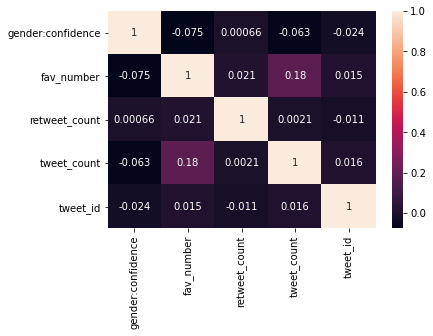

In [22]:
#HEATMAP
sns.heatmap(correlation,xticklabels = correlation.columns,yticklabels = correlation.columns,annot = True)

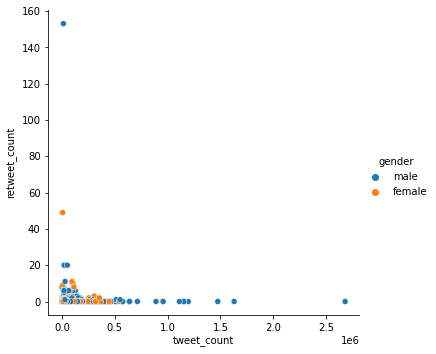

In [23]:
#relplot
sns.relplot(x = 'tweet_count',y = 'retweet_count',hue = 'gender',data = df)

In [24]:
import nltk
#nltk.download('all')
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
description_list = [] 
for description in df.description:
    description = re.sub("[^a-zA-Z]", " ", description)
    # sub method finds the given pattern ([^a-zA-Z] means, NOT letter like ":") and changes them with " " (space)
    description = description.lower()
    description = nltk.word_tokenize(description)
    # we make a word list from our text
    lemma = nltk.WordNetLemmatizer()
    description = [lemma.lemmatize(word) for word in description]
    # we found the roots of each words with lemma
    description=[word for word in description if not word in set(stopwords.words('english'))]
    description = " ".join(description)
    # after all these steps,we joined the words together.
    description_list.append(description)
    # and append these texts into the list we created.

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Intel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# 1. What are the most common words used by Males and Females?

In [25]:
df['description_list'] = description_list
df_male=df[df.gender=='male']
df_female=df[df.gender=='female']
df_male.head()

_last_judgment_at gender  gender:confidence         created  fav_number  \
0     10/26/15 23:24   male             1.0000    12/5/13 1:48           0   
2     10/26/15 23:33   male             0.6625  11/28/14 11:30        7696   
3     10/26/15 23:10   male             1.0000   6/11/09 22:39         202   
17    10/26/15 22:50   male             1.0000  10/18/09 11:41           5   
23     10/27/15 1:34   male             1.0000    1/11/13 1:18        2871   

              name  retweet_count  \
0          sheezy0              0   
2   lwtprettylaugh              1   
3      douggarland              0   
17      SSmyth2010              0   
23     StrictlyAri              0   

                                                 text  tweet_count  \
0   Robbie E Responds To Critics After Win Against...       110964   
2   i absolutely adore when louis starts the songs...         5617   
3   Hi @JordanSpieth - Looking at the url - do you...         1693   
17  @coolyazzy94 Ditto - I'm still learning the fa...           91   
23  YALL LMFAOO RIGHT WHEN THE CHORUS CAME ON, A T...         2219   

     tweet_created                                        description  \
0   10/26/15 12:40                              i sing my own rhythm.   
2   10/26/15 12:40                louis whining and squealing and all   
3   10/26/15 12:40  Mobile guy.  49ers, Shazam, Google, Kleiner Pe...   
17  10/26/15 12:40  Over enthusiastic F1 fan.  Model collector, mu...   
23  10/26/15 12:40                          You had me from the start   

        tweet_id   tweet_location               user_timezone  \
0   6.587300e+17  main; @Kan1shk3                     Chennai   
2   6.587300e+17           clcncl                    Belgrade   
3   6.587300e+17    Palo Alto, CA  Pacific Time (US & Canada)   
17  6.587300e+17          Glasgow                      London   
23  6.587300e+17        Tampa, FL                      London   

                                     description_list  
0                                         sing rhythm  
2                             louis whining squealing  
3   mobile guy er shazam google kleiner perkins ya...  
17  enthusiastic f fan model collector music fan f...  
23                                              start

In [26]:
description_list

['sing rhythm',
 'louis whining squealing',
 'mobile guy er shazam google kleiner perkins yahoo sprint pc airtouch air force stanford gsb uva dad husband brother golfer',
 'know',
 'renaissance art historian university nottingham fuelled haribo partial coffee soft spot renaissance china national teaching fellow',
 'im p bo burnham disney world',
 'enthusiastic f fan model collector music fan film fanatic also aspergian',
 'bled died take away sin',
 'start',
 'bsc economics graduate coys',
 'rl writer lewd aspiring femboy enjoys oneechans girlcock rts softcore r nsfw account listed',
 'award winning author paranormal romance thriller hath fury technology writer http co lmmiowenqq asmsg',
 'self proclaimed princess occasional pain',
 'k smooty drink alot could worse scrolling girl nude watching brady beat team patsnation suprememeninist alwaysturnt',
 'free bros ebk otr real kno grind wea come',
 'lover woman dog cat dog movie comic tv video game book wrestling existentialism adult ent'

In [27]:
Male_Words = pd.Series(' '.join(df_male['description_list'].astype(str)).lower().split(" ")).value_counts()[:5]
Male_Words

co      378
http    312
love    210
fan     179
life    146
dtype: int64

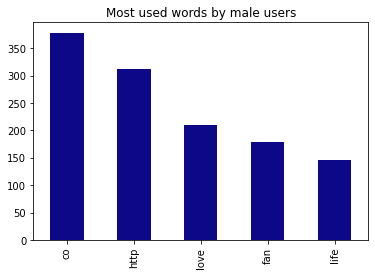

In [28]:
plot1 = Male_Words.plot(kind='bar',stacked=True, colormap='plasma', title='Most used words by male users' )

In [29]:
Female_Words = pd.Series(' '.join(df_female['description_list'].astype(str)).lower().split(" ")).value_counts()[:5]
Female_Words

love    276
co      219
http    195
life    183
like    124
dtype: int64

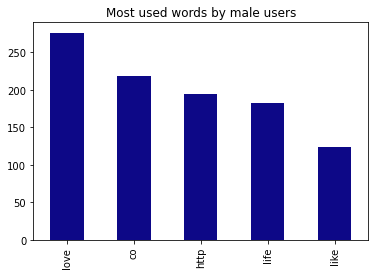

In [30]:
plot1 = Female_Words.plot(kind='bar',stacked=True, colormap='plasma', title='Most used words by male users' )

#  2.Among the genders, which gender made highest number of tweets?

In [31]:
highest_tweets = df.groupby('gender').tweet_count.sum()
highest_tweets

gender
female     99891409
male      134128882
Name: tweet_count, dtype: int64

<AxesSubplot:ylabel='tweet_count'>

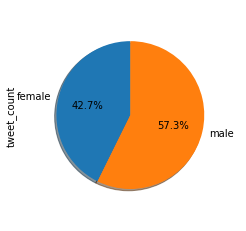

In [32]:
highest_tweets.plot(kind = 'pie',startangle = 90,shadow = True,radius = 0.85,autopct = '%1.1f%%')

Males made the highest number of tweets.

In [33]:
#Changing 'created', 'tweet_created', '_last_judgment_at' columns Dtype to integer
df['created']= pd.to_datetime(df['created'])
df['_last_judgment_at']= pd.to_datetime(df['_last_judgment_at'])
df['tweet_created']= pd.to_datetime(df['tweet_created'])

In [34]:
#extracting year, month etc from datatime datype and adding to dataset.
df['created_year'] = df['created'].dt.year
df['created_month'] = df['created'].dt.month
df['created_week'] = df['created'].dt.week
df['created_day'] = df['created'].dt.day
df['created_hour'] = df['created'].dt.hour
df['created_minute'] = df['created'].dt.minute
df['created_dayofweek'] = df['created'].dt.dayofweek

In [35]:
df['tweet_created_year'] = df['tweet_created'].dt.year
df['tweet_created_month'] = df['tweet_created'].dt.month
df['tweet_created_week'] = df['tweet_created'].dt.week
df['tweet_created_day'] = df['tweet_created'].dt.day
df['tweet_created_hour'] = df['tweet_created'].dt.hour
df['tweet_created_minute'] = df['tweet_created'].dt.minute
df['tweet_created_dayofweek'] = df['tweet_created'].dt.dayofweek

In [36]:
df['_last_judgment_at_year'] = df['_last_judgment_at'].dt.year
df['_last_judgment_at_month'] = df['_last_judgment_at'].dt.month
df['_last_judgment_at_week'] = df['_last_judgment_at'].dt.week
df['_last_judgment_at_day'] = df['_last_judgment_at'].dt.day
df['_last_judgment_at_hour'] = df['_last_judgment_at'].dt.hour
df['_last_judgment_at_minute'] = df['_last_judgment_at'].dt.minute
df['_last_judgment_at_dayofweek'] = df['_last_judgment_at'].dt.dayofweek

In [37]:
from sklearn.preprocessing import LabelEncoder
Le=LabelEncoder()

df['gender'] = Le.fit_transform(df['gender'])

df['tweet_location'] = Le.fit_transform(df['tweet_location'])

df['user_timezone'] = Le.fit_transform(df['user_timezone'])

In [38]:
df.head()

_last_judgment_at  gender  gender:confidence             created  \
0 2015-10-26 23:24:00       1             1.0000 2013-12-05 01:48:00   
2 2015-10-26 23:33:00       1             0.6625 2014-11-28 11:30:00   
3 2015-10-26 23:10:00       1             1.0000 2009-06-11 22:39:00   
5 2015-10-27 01:47:00       0             1.0000 2010-03-11 18:14:00   
9 2015-10-27 01:49:00       0             1.0000 2011-05-13 03:32:00   

   fav_number            name  retweet_count  \
0           0         sheezy0              0   
2        7696  lwtprettylaugh              1   
3         202     douggarland              0   
5        3901   monroevicious              0   
9        3115   GabrieleNeher              0   

                                                text  tweet_count  \
0  Robbie E Responds To Critics After Win Against...       110964   
2  i absolutely adore when louis starts the songs...         5617   
3  Hi @JordanSpieth - Looking at the url - do you...         1693   
5  Ive seen people on the train with lamps, chair...        20036   
9  @Evielady just how lovely is the tree this yea...        26085   

        tweet_created  ... tweet_created_hour  tweet_created_minute  \
0 2015-10-26 12:40:00  ...                 12                    40   
2 2015-10-26 12:40:00  ...                 12                    40   
3 2015-10-26 12:40:00  ...                 12                    40   
5 2015-10-26 12:40:00  ...                 12                    40   
9 2015-10-26 12:40:00  ...                 12                    40   

   tweet_created_dayofweek  _last_judgment_at_year _last_judgment_at_month  \
0                        0                    2015                      10   
2                        0                    2015                      10   
3                        0                    2015                      10   
5                        0                    2015                      10   
9                        0                    2015                      10   

   _last_judgment_at_week  _last_judgment_at_day  _last_judgment_at_hour  \
0                      44                     26                      23   
2                      44                     26                      23   
3                      44                     26                      23   
5                      44                     27                       1   
9                      44                     27                       1   

   _last_judgment_at_minute  _last_judgment_at_dayofweek  
0                        24                            0  
2                        33                            0  
3                        10                            0  
5                        47                            1  
9                        49                            1  

[5 rows x 36 columns]

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6077 entries, 0 to 19995
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   _last_judgment_at            6077 non-null   datetime64[ns]
 1   gender                       6077 non-null   int32         
 2   gender:confidence            6077 non-null   float64       
 3   created                      6077 non-null   datetime64[ns]
 4   fav_number                   6077 non-null   int64         
 5   name                         6077 non-null   object        
 6   retweet_count                6077 non-null   int64         
 7   text                         6077 non-null   object        
 8   tweet_count                  6077 non-null   int64         
 9   tweet_created                6077 non-null   datetime64[ns]
 10  description                  6077 non-null   object        
 11  tweet_id                     6077 non-null

# Feature selection

In [40]:
df = df.drop(['name', '_last_judgment_at', 'created', 'tweet_created','text','description','description_list'], axis = 1)

In [41]:
df.head()

gender  gender:confidence  fav_number  retweet_count  tweet_count  \
0       1             1.0000           0              0       110964   
2       1             0.6625        7696              1         5617   
3       1             1.0000         202              0         1693   
5       0             1.0000        3901              0        20036   
9       0             1.0000        3115              0        26085   

       tweet_id  tweet_location  user_timezone  created_year  created_month  \
0  6.587300e+17            3880             45          2013             12   
2  6.587300e+17            3622             26          2014             11   
3  6.587300e+17            2455            103          2009              6   
5  6.587300e+17            2238             44          2010              3   
9  6.587300e+17            2335             14          2011              5   

   ...  tweet_created_hour  tweet_created_minute  tweet_created_dayofweek  \
0  ...                  12                    40                        0   
2  ...                  12                    40                        0   
3  ...                  12                    40                        0   
5  ...                  12                    40                        0   
9  ...                  12                    40                        0   

   _last_judgment_at_year  _last_judgment_at_month  _last_judgment_at_week  \
0                    2015                       10                      44   
2                    2015                       10                      44   
3                    2015                       10                      44   
5                    2015                       10                      44   
9                    2015                       10                      44   

   _last_judgment_at_day  _last_judgment_at_hour  _last_judgment_at_minute  \
0                     26                      23                        24   
2                     26                      23                        33   
3                     26                      23                        10   
5                     27                       1                        47   
9                     27                       1                        49   

   _last_judgment_at_dayofweek  
0                            0  
2                            0  
3                            0  
5                            1  
9                            1  

[5 rows x 29 columns]

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6077 entries, 0 to 19995
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       6077 non-null   int32  
 1   gender:confidence            6077 non-null   float64
 2   fav_number                   6077 non-null   int64  
 3   retweet_count                6077 non-null   int64  
 4   tweet_count                  6077 non-null   int64  
 5   tweet_id                     6077 non-null   float64
 6   tweet_location               6077 non-null   int32  
 7   user_timezone                6077 non-null   int32  
 8   created_year                 6077 non-null   int64  
 9   created_month                6077 non-null   int64  
 10  created_week                 6077 non-null   int64  
 11  created_day                  6077 non-null   int64  
 12  created_hour                 6077 non-null   int64  
 13  created_minute   

In [43]:
X = df.drop('gender', axis = 1)
X

gender:confidence  fav_number  retweet_count  tweet_count  \
0                 1.0000           0              0       110964   
2                 0.6625        7696              1         5617   
3                 1.0000         202              0         1693   
5                 1.0000        3901              0        20036   
9                 1.0000        3115              0        26085   
...                  ...         ...            ...          ...   
19989             1.0000          53              0         1072   
19990             1.0000       23186              0        32765   
19993             1.0000         170              0         4253   
19994             1.0000        3745              0        10727   
19995             1.0000       33834              1        29190   

           tweet_id  tweet_location  user_timezone  created_year  \
0      6.587300e+17            3880             45          2013   
2      6.587300e+17            3622             26          2014   
3      6.587300e+17            2455            103          2009   
5      6.587300e+17            2238             44          2010   
9      6.587300e+17            2335             14          2011   
...             ...             ...            ...           ...   
19989  6.587400e+17            3144             18          2011   
19990  6.587400e+17            3494             44          2010   
19993  6.587400e+17            1077             81          2010   
19994  6.587400e+17            2217             92          2009   
19995  6.587400e+17            2190             44          2013   

       created_month  created_week  ...  tweet_created_hour  \
0                 12            49  ...                  12   
2                 11            48  ...                  12   
3                  6            24  ...                  12   
5                  3            10  ...                  12   
9                  5            19  ...                  12   
...              ...           ...  ...                 ...   
19989              2             6  ...                  13   
19990              8            31  ...                  13   
19993              8            31  ...                  13   
19994              7            30  ...                  13   
19995              1             4  ...                  13   

       tweet_created_minute  tweet_created_dayofweek  _last_judgment_at_year  \
0                        40                        0                    2015   
2                        40                        0                    2015   
3                        40                        0                    2015   
5                        40                        0                    2015   
9                        40                        0                    2015   
...                     ...                      ...                     ...   
19989                    18                        0                    2015   
19990                    18                        0                    2015   
19993                    18                        0                    2015   
19994                    18                        0                    2015   
19995                    18                        0                    2015   

       _last_judgment_at_month  _last_judgment_at_week  _last_judgment_at_day  \
0                           10                      44                     26   
2                           10                      44                     26   
3                           10                      44                     26   
5                           10                      44                     27   
9                           10                      44                     27   
...                        ...                     ...                    ...   
19989                       10                      44                     26   
19990  

In [44]:
Y=df['gender']
Y

0        1
2        1
3        1
5        0
9        0
        ..
19989    1
19990    0
19993    1
19994    0
19995    1
Name: gender, Length: 6077, dtype: int32

In [45]:
#splitting training and testing dataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,plot_confusion_matrix
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

accuracy_scores=dict()

# Logistic Regression 

Logistic Regression Accuracy: 0.5271381578947368


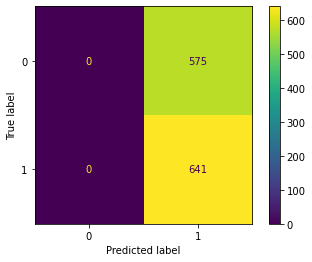

In [46]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print("Logistic Regression Accuracy:",accuracy_score(y_pred,y_test))

logistic_regression=plot_confusion_matrix(X=x_test,y_true=y_test,estimator=lr)
accuracy_scores["Logistic Regression"]=accuracy_score(y_pred,y_test)

# Support Vector Machine

In [47]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)

SVM accuracy: 0.5271381578947368


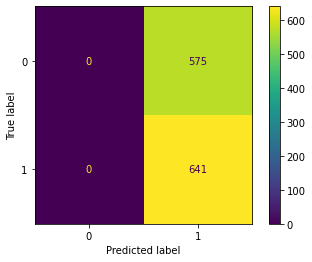

In [48]:
from sklearn.metrics import accuracy_score,plot_confusion_matrix
print("SVM accuracy:",accuracy_score(y_test, y_pred))
svm=plot_confusion_matrix(X=x_test,y_true=y_test,estimator=svc)
accuracy_scores["SVM"]=accuracy_score(y_test, y_pred)

# RandomForestClassifier

RandomForestClassifier Accuracy: 0.5550986842105263


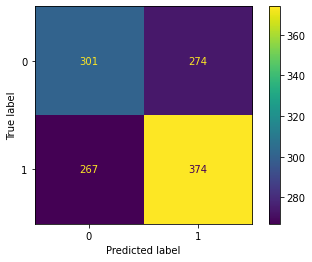

In [49]:
from sklearn.ensemble import  RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
y_head=rfc.predict(x_test)
print("RandomForestClassifier Accuracy:",rfc.score(x_test,y_test))
random_forest_classifier=plot_confusion_matrix(X=x_test,y_true=y_test,estimator=rfc)

accuracy_scores["RandomForest"]=rfc.score(x_test,y_test)

# Comparing the accuracy of the three models!!

In [50]:
accuracy_scores

{'Logistic Regression': 0.5271381578947368,
 'SVM': 0.5271381578947368,
 'RandomForest': 0.5550986842105263}

In [51]:
keys = accuracy_scores.keys()
values = accuracy_scores.values()
keys

dict_keys(['Logistic Regression', 'SVM', 'RandomForest'])

In [52]:
values

dict_values([0.5271381578947368, 0.5271381578947368, 0.5550986842105263])

Text(0, 0.5, 'Accuracy')

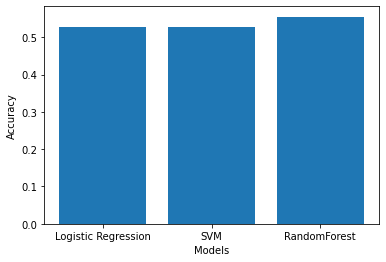

In [53]:
plt.bar(keys,values)
plt.xlabel('Models')
plt.ylabel("Accuracy")

>AMONG THE MODELS LOGISTIC REGRESSION , SUPPORT VECTOR MACHINE , RANDOM FORREST THE MODEL WITH HIGHEST ACCURACY IS : 
>* **RANDOM FOREST**